# Conhecimentos Técnicos - Cientista de Dados Oncase

### Este projeto de REGRESSÃO é o 4º de  4 etapas do teste de conhecimento para vaga de cientista de dados da empresa Oncase.
Author: Dorivan Kadatz Borba<br>
Coding: utf-8<br>
Language: PT-BR

# Montando o driver e importando pacotes

In [42]:
!pip install xgboost --upgrade
!pip install catboost
!pip install lightgbm 
!pip install seaborn==0.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split


from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor


import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so # Necessário seaborn 0.12.1 ou maior
from matplotlib import style

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importando os dados

In [44]:
# importa os dados de treino e teste do google drive.
df_train = pd.read_csv("/content/drive/MyDrive/Oncase/regression_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Oncase/regression_test.csv")

# Análise exploratoria e Pré processamento

In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  180 non-null    float64
 1   X1      261 non-null    float64
 2   X2      261 non-null    float64
 3   X3      261 non-null    float64
 4   X4      261 non-null    float64
 5   X5      261 non-null    float64
 6   X6      261 non-null    int64  
 7   X7      261 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 16.4 KB


In [46]:
df_test.describe()

,target,X1,X2,X3,X4,X5,X6,X7
count,180.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,1083.167620,2.118804,-0.729926,50.019371,2.570686,-65.634193,4.153257,-1.896956
std,1266.764414,2.924070,4.065920,4.109684,2.456733,7.827388,3.345416,10.133573
min,0.619759,-7.187993,-12.530861,38.282205,0.017793,-123.280755,0.000000,-56.751775
25%,203.306229,0.220241,-3.113019,47.368662,0.798704,-69.361831,0.000000,-7.315595
50%,623.905972,2.038765,-0.816475,50.070453,1.824582,-65.517502,5.000000,-1.918715
75%,1522.742335,4.008733,1.836272,52.659709,3.587555,-61.681399,8.000000,4.315239
max,8270.877273,9.586412,11.610249,65.704951,16.798910,-43.237419,8.000000,27.284085


In [47]:
# Verificando a quantidade de observações, tipo dos dados e se existe dados nulos.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  715 non-null    float64
 1   X1      1042 non-null   float64
 2   X2      1031 non-null   float64
 3   X3      1042 non-null   float64
 4   X4      1042 non-null   float64
 5   X5      1042 non-null   float64
 6   X6      1042 non-null   int64  
 7   X7      1042 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 65.2 KB


In [48]:
df_train.describe()

,target,X1,X2,X3,X4,X5,X6,X7
count,715.000000,1042.000000,1031.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,1349.940229,2.421925,-0.460781,52.094329,2.462871,-65.284233,4.381958,-1.287435
std,1593.201095,3.182976,4.426286,31.374828,2.541632,9.033489,3.290306,11.066380
min,0.062551,-8.699406,-13.651540,38.035456,0.002360,-121.450423,0.000000,-69.835905
25%,230.632308,0.170590,-3.307931,47.087106,0.671196,-69.126630,0.000000,-7.830007
50%,808.374368,2.508671,-0.461150,49.972867,1.652609,-65.360660,5.000000,-1.074191
75%,1849.754221,4.540218,2.406651,52.674305,3.361181,-61.187635,8.000000,5.659476
max,10382.469480,12.380693,12.926106,500.000000,18.813009,53.919202,8.000000,30.376348


In [49]:
print('df_train dados faltantes na feature "target":',round(np.abs(df_train['target'].count() / len(df_train) - 1), 2),'%')
print('df_test de dados faltantes na feature "target":',round(np.abs(df_test['target'].count() / len(df_test) - 1), 2),'%')

df_train dados faltantes na feature "target": 0.31 %
df_test de dados faltantes na feature "target": 0.31 %


- A quantidade de valores faltantes nos dados de treino e teste ambos são 31%. É uma quantidade muito grande, mas a pergunta é esses dados faltantes por padrão deveriam ser zero? ou realmente o dado não existe. Por via das dúvidas e sem saber do que se trata, farei um modelo com os dados faltantes preenchidos com zero, e um modelo com os dados faltantes tratados.


- Possíveis tratamentos para os valores núlos:
 - Substituílos pela média, porém como são muitos dados ficaria muito artificial, imagine uma longa barra em um grafico com alta frequência no valor médio;
 - Substituir o valor pela média dos vizinhos, uma boa idéia;
 - Montar um modelo de regressão e prever esses valores, outra ótima ideia.

/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


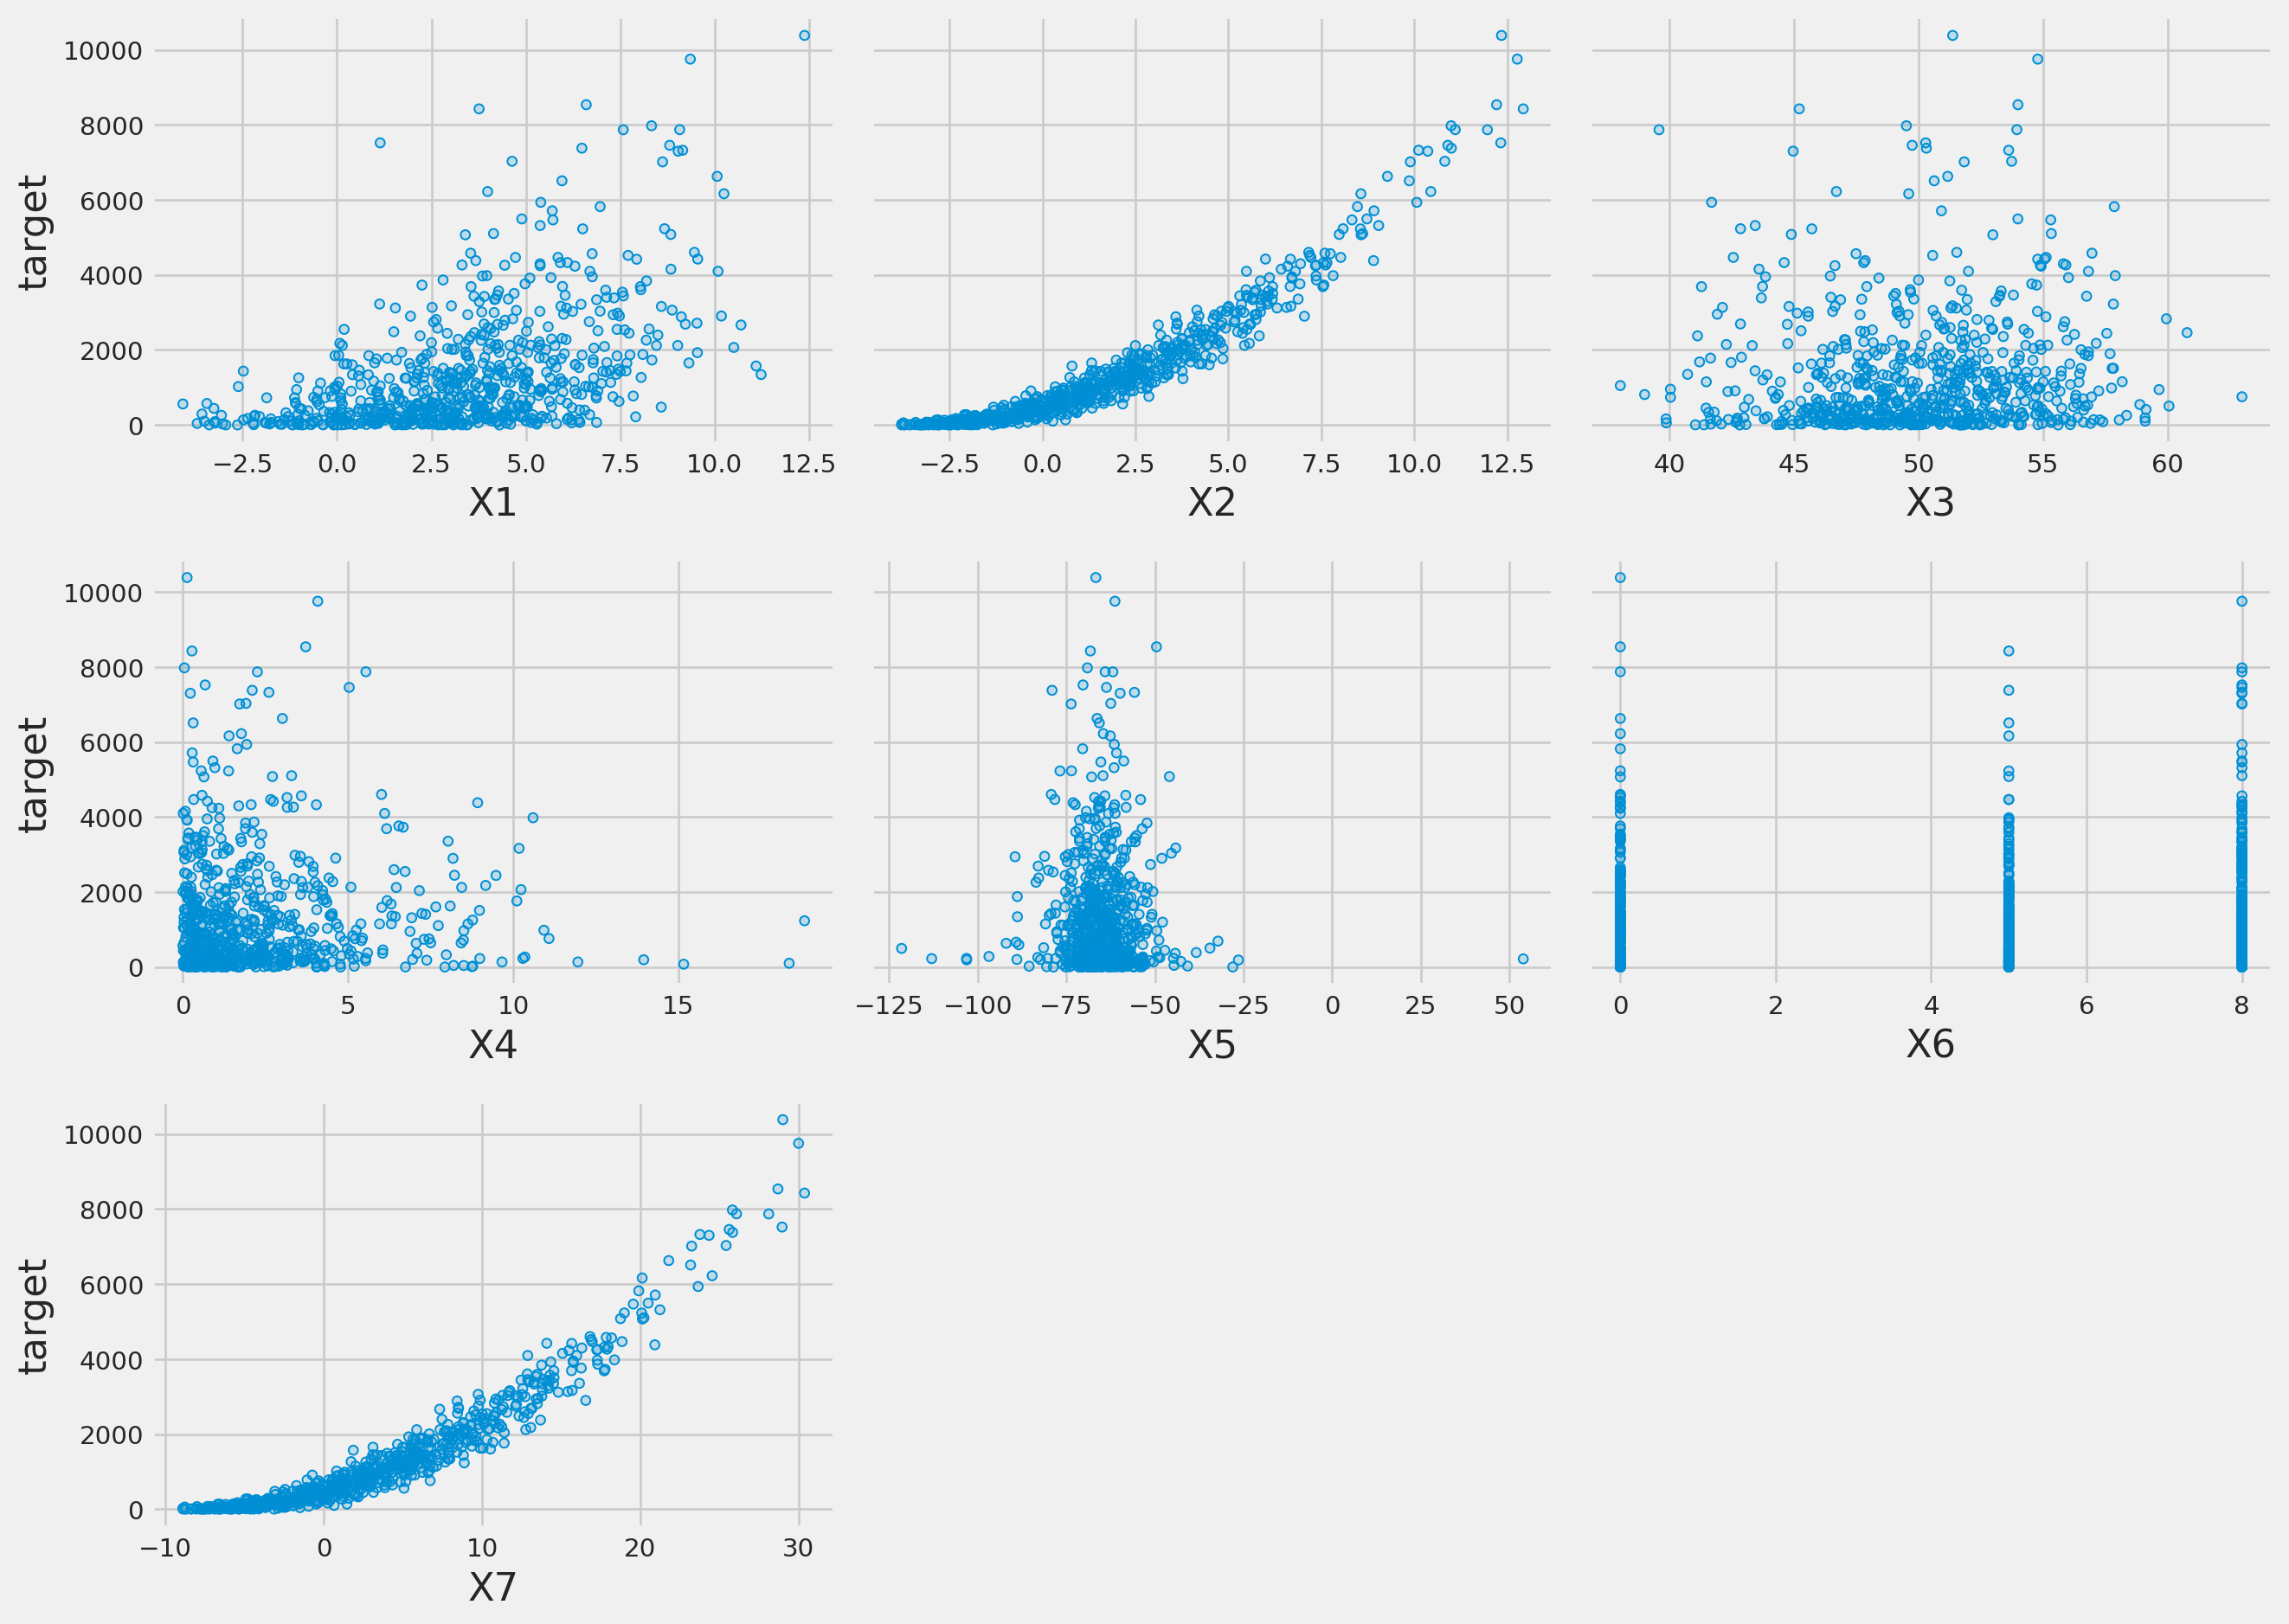

In [50]:
fig = (
    so.Plot(df_train, y="target")
    .pair(x=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'], wrap=3)
    .add(so.Dots())
    .layout(size=(14, 10))
)
fig.theme({**style.library["fivethirtyeight"]})

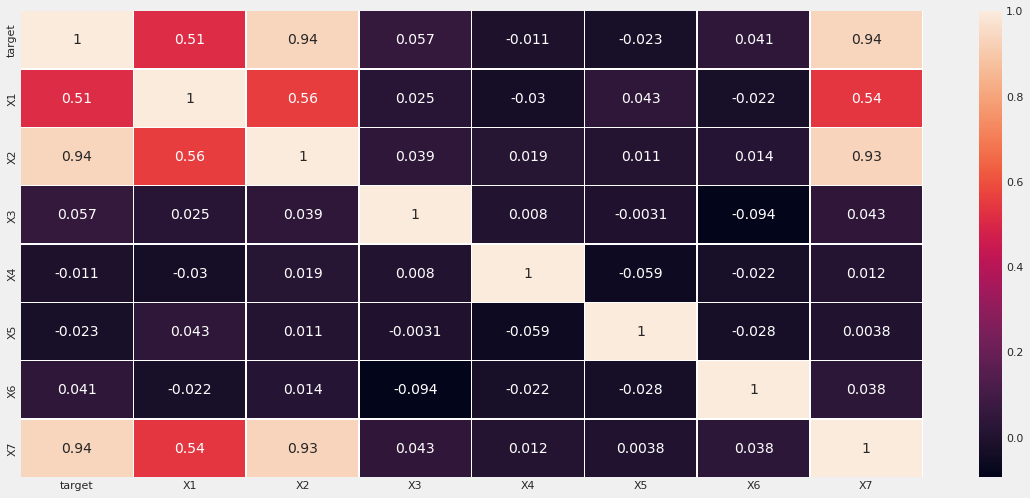

In [51]:
# Calcula a correlação entre as features.
df_corr = df_train.corr()

# Retorna um gráfico de calor calor de acordo com os valores da variável 'df_corr'
sns.heatmap(df_corr, annot=True, linewidth=.5)
sns.set(rc={"figure.figsize":(18, 8)})

- A feature 'target' tem forte correlação com as features 'X2 e X7', e uma boa correlaçao com a feature 'X1'.


# Tratando os dados faltantes.
#### Separando os dados nulos dos não nulos

In [52]:
# Retorna o dataset com os valores True para nulo ou False para não nulo e armazena na variável.
nulo = pd.DataFrame(df_train.isna())
# Retorna apenas os valores True.
nulo = nulo[nulo['target'] == True]
nulo

,target,X1,X2,X3,X4,X5,X6,X7
0,True,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False
9,True,False,False,False,False,False,False,False
10,True,False,False,False,False,False,False,False
11,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1021,True,False,False,False,False,False,False,False
1022,True,False,False,False,False,False,False,False
1023,True,False,False,False,False,False,False,False
1024,True,False,False,False,False,False,False,False


In [53]:
# Localiza os dados nulos apartir do índice da variável nulo.
df_train_nulo = df_train.iloc[nulo.index]
# Remove a feature 'target' dos dados, para que fique apenas os dados de treino.
df_train_nulo.drop(columns='target', inplace=True)
# Remove as observações faltantes que restaram.
df_train_nulo.dropna(inplace=True)

df_train_nulo

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,X1,X2,X3,X4,X5,X6,X7
2,-1.485531,-13.102537,42.367991,3.991558,-67.108014,8,-30.790962
9,1.676011,-5.238362,50.831210,3.191849,-66.100748,5,-12.310151
10,-0.333546,-2.732214,45.427923,5.193929,-65.660851,8,-6.420703
11,2.009244,-8.373409,51.853154,1.440188,-66.563772,0,-19.677510
14,1.990359,-6.480468,55.314563,5.056748,-62.310423,5,-15.229101
...,...,...,...,...,...,...,...
1021,-0.823289,-5.257838,47.572539,2.941868,-65.805287,0,-12.355919
1022,-6.255805,-5.438488,46.972944,0.219929,-69.461512,8,-12.780447
1023,3.251135,-4.107206,51.077179,1.871690,-65.986065,8,-9.651933
1024,1.964698,-4.203196,52.408473,1.927989,-55.376227,0,-9.877511


In [54]:
df_train_nulo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 2 to 1040
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      316 non-null    float64
 1   X2      316 non-null    float64
 2   X3      316 non-null    float64
 3   X4      316 non-null    float64
 4   X5      316 non-null    float64
 5   X6      316 non-null    int64  
 6   X7      316 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 19.8 KB


In [55]:
# Novo data frame com os dados não nulos, aqui podemos montar um modelo para prever os valores faltantes.
df_train_nao_nulo = df_train.drop(nulo.index)
df_train_nao_nulo

,target,X1,X2,X3,X4,X5,X6,X7
1,47.735389,3.074317,-2.836000,49.396649,0.261998,-66.570716,0,-6.664599
3,908.202209,6.907396,-0.308967,57.228787,0.256771,-66.181266,5,-0.726072
4,1640.461863,1.916788,3.460290,51.703375,2.463790,-65.143663,5,8.131680
5,750.197635,1.090232,1.256970,50.290722,1.477950,-58.637657,5,2.953880
6,1042.939629,1.145275,2.354394,51.601926,3.968927,-60.466758,5,5.532825
...,...,...,...,...,...,...,...,...
1036,1459.419250,0.588939,3.120751,51.632211,0.427576,-72.665728,8,7.333765
1037,4296.426459,5.375810,6.937947,55.810467,1.698025,-65.819509,8,16.304176
1038,54.530919,0.619207,-1.925819,48.168606,1.357223,-65.385243,8,-4.525675
1039,1636.535078,4.548172,2.886253,47.775525,1.278439,-56.312543,8,6.782694


In [56]:
df_train_nao_nulo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 1 to 1041
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  715 non-null    float64
 1   X1      715 non-null    float64
 2   X2      715 non-null    float64
 3   X3      715 non-null    float64
 4   X4      715 non-null    float64
 5   X5      715 non-null    float64
 6   X6      715 non-null    int64  
 7   X7      715 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 50.3 KB


# Separando os dados de treino e teste para previsão dos dados nulos.

In [57]:
# A variável X irá receber as features independentes ou preditoras.
X = df_train_nao_nulo.drop(columns='target')

# A variável y irá receber a feature terget.
y = df_train_nao_nulo['target']

# Separamos os dados em treino 80% e teste 20% com train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [58]:
# Função para retornar uma serie de metricas de avaliação
def metricas_de_avaliacao(y_true, y_pred):
    print(
    'MAE: ',np.round(mean_absolute_error(y_true, y_pred), 2),'\n',
    'RMSE: ',np.round(np.sqrt(mean_squared_error(y_true, y_pred)), 2),'\n',
    'MAPE: ',np.round(mean_absolute_percentage_error(y_true, y_pred), 2),'\n',
    'R2: ',np.round(r2_score(y_true, y_pred), 2))

# Grid search custom para encontrar o melhor algoritmo

In [59]:
def grid_search_regression_models(X_train, X_test, y_train, y_test):

  # Data frame com os resultados obtidos de cada modelo
  resultados = pd.DataFrame(index=['MAE', 'RMSE', 'MAPE', 'R2'])
  # Dicionário com os algoritmos de regressão
  algoritmos = {'Suport Vector Machine Regression(SVM-SVR)':SVR(),
                'K-Neighbors Regressor' : KNeighborsRegressor(),
                'CatBoost Regressor': CatBoostRegressor(verbose = False, n_estimators=1000),
                'XGBoost Regressor': XGBRegressor(verbose = False, n_estimators=1000),
                'LightGBM Regressor': LGBMRegressor(verbose = -1, n_estimators=1000)}

  # Loop que percorre cada modelo, treina, treina, e avalia.
  for nome, alg in algoritmos.items():
    # Treina e prediz o modelo
    model = alg.fit(X_train, y_train).predict(X_test)
    # Metricas de avaliação
    MAE = np.round(mean_absolute_error(y_test, model), 2)
    RMSE = np.round(np.sqrt(mean_squared_error(y_test, model)), 2)
    MAPE = np.round(mean_absolute_percentage_error(y_test, model), 2)
    R2 = np.round(r2_score(y_test, model), 2)
    # Adiciona o resultado no data frame de resultados
    resultados[nome] = [MAE, RMSE, MAPE, R2]
  # Retorna o resultado final
  return(resultados.T.sort_values(by='MAPE'))

In [60]:
grid_search_regression_models(X_train, X_test, y_train, y_test)

[02:17:57] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.



,MAE,RMSE,MAPE,R2
CatBoost Regressor,32.54,63.01,0.31,1.00
XGBoost Regressor,90.58,144.15,0.54,0.99
LightGBM Regressor,129.68,329.01,1.15,0.95
K-Neighbors Regressor,144.31,229.47,2.91,0.98
Suport Vector Machine Regression(SVM-SVR),1025.30,1529.54,27.12,-0.07


- Temos que nosso melhor modelo para esses dados é o CatBoost com erro médio percentual de 31%.

### CatBoost Regressor

In [61]:
# Instancia o modelo
cat_model = CatBoostRegressor(verbose = False, n_estimators=1000)
# Treina o modelo com os dados de treino
cat_model.fit(X, y)
# Prediz os valores e para os dados nulos
df_train_nulo['target'] = cat_model.predict(df_train_nulo)

<ipython-input-61-2051164ef95c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_nulo['target'] = cat_model.predict(df_train_nulo)


Text(0.5, 0, 'CatBoost Feature Importance')

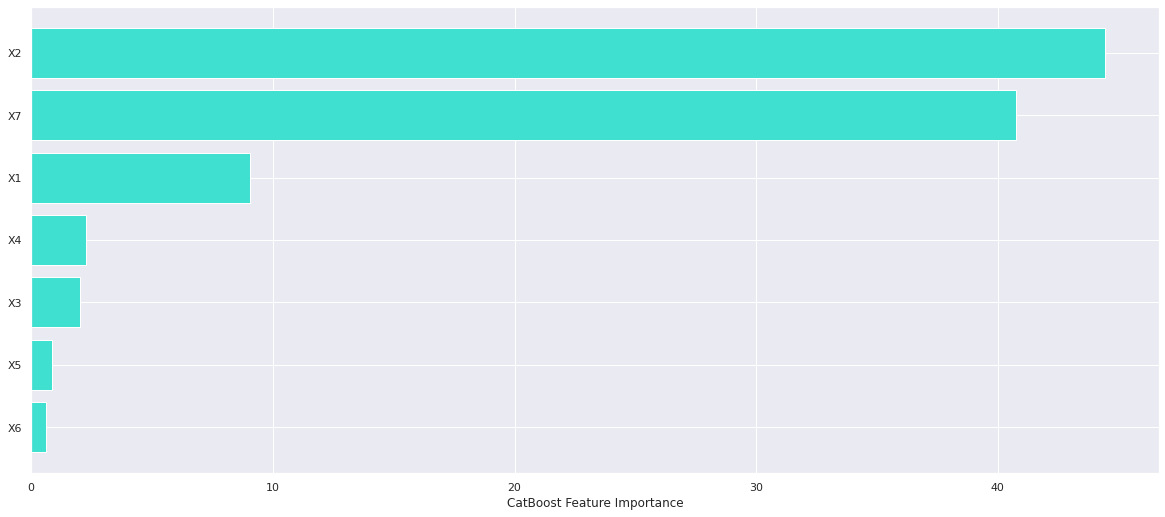

In [62]:
# Gráfico com o grau de importancia das features
sorted_feature_importance = cat_model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_feature_importance], 
        cat_model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [63]:
# Junta os dos dataframes para a predição final com os dados tratados com regressão.
df_train_final = df_train_nao_nulo.append(df_train_nulo)

In [64]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 1 to 1040
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  1031 non-null   float64
 1   X1      1031 non-null   float64
 2   X2      1031 non-null   float64
 3   X3      1031 non-null   float64
 4   X4      1031 non-null   float64
 5   X5      1031 non-null   float64
 6   X6      1031 non-null   int64  
 7   X7      1031 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 72.5 KB


# Modelo final dos dados tratados com a regressão.

In [65]:
# A variável X irá receber as variáveis independentes ou preditoras.
X_train = df_train_final.drop(columns='target')
# A variável y irá receber a variável terget, variável dependente ou predita.
y_train = df_train_final['target']

df_test.dropna(inplace=True)

# Dados de predissão do teste final
X_test = df_test.drop(columns='target')
# Dados de validação do teste final
y_test = df_test['target']

In [66]:
# Instancia o modelo
cat_model = CatBoostRegressor(verbose = False, n_estimators=1000)
# Treina o modelo com os dados de treino
cat_model.fit(X_train, y_train)
# Prediz os valores e para os dados nulos
ypred = cat_model.predict(X_test)

In [67]:
metricas_de_avaliacao(y_test, ypred)

MAE:  31.67 
 RMSE:  59.98 
 MAPE:  0.49 
 R2:  1.0


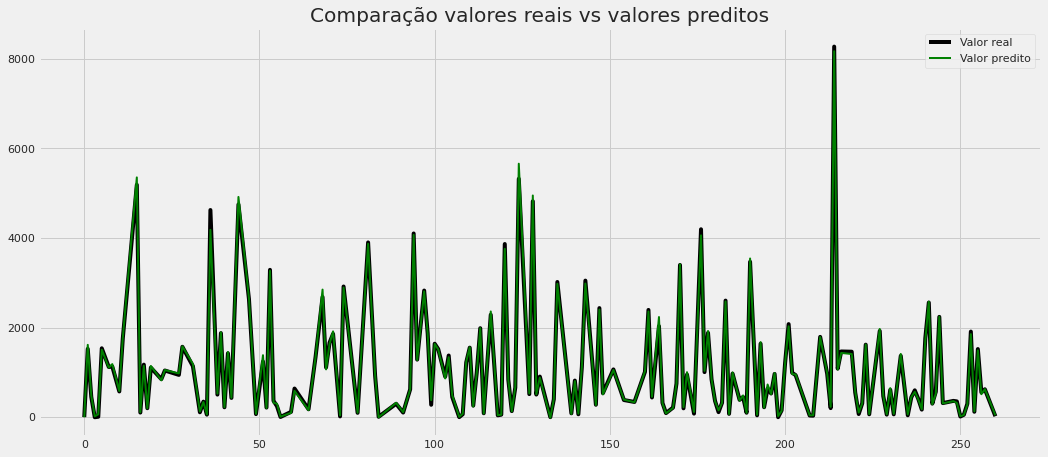

In [68]:
y_validation = pd.DataFrame(y_test)
y_validation['prediction'] = ypred

#y_validation = y_validation[100:130]

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

ax = sns.lineplot(x = y_validation.index, y = y_validation['target'], color = 'black', label='Valor real', lw=4)
ax = sns.lineplot(x = y_validation.index, y = y_validation['prediction'], color = 'green',label='Valor predito', lw=2)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Comparação valores reais vs valores preditos')
fig.set_size_inches(16,7)

In [69]:
y_validation.sample(10)

,target,prediction
198,0.988649,25.327182
164,2033.056675,2236.548621
121,838.917469,839.259804
141,66.785926,79.444774
42,431.318075,435.498371
93,623.233829,621.354772
120,3865.788272,3759.198009
60,640.531301,588.258808
182,323.364426,318.066789
27,945.461641,978.031594


- Essa técnica estava indo até legal no começo quando não existiam dados nulos no data frame, até que no final quando todos os dados nulos foram tratados com o modelo de regressão e utilizamos o modelo para o teste final, o desempenho do MAPE ficou extremamente alto

# Modelo com todos os dados tratados com ZEROS

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  715 non-null    float64
 1   X1      1042 non-null   float64
 2   X2      1031 non-null   float64
 3   X3      1042 non-null   float64
 4   X4      1042 non-null   float64
 5   X5      1042 non-null   float64
 6   X6      1042 non-null   int64  
 7   X7      1042 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 65.2 KB


In [71]:
# Preenche todos os valores nulos com o valor zero.
df_train['target'].fillna(value=0,inplace=True)
# Remove as observações nulas restante
df_train.dropna(inplace=True)

In [72]:
# A variável X irá receber as feature independentes ou preditoras.
X = df_train.drop(columns='target')

# A variável y irá receber a feature terget.
y = df_train['target']

# Separamos os dados em treino 80% e teste 20% com train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [73]:
grid_search_regression_models(X_train, X_test, y_train, y_test)

[02:18:26] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.



,MAE,RMSE,MAPE,R2
K-Neighbors Regressor,169.21,389.75,1.099380e+17,0.91
LightGBM Regressor,134.90,346.22,1.220598e+17,0.93
CatBoost Regressor,108.81,384.71,1.226848e+17,0.91
XGBoost Regressor,119.44,324.49,1.258291e+17,0.94
Suport Vector Machine Regression(SVM-SVR),797.45,1385.50,3.257357e+17,-0.18


- Percebe-se o quão ruim ficou o modelo com todos os dados nulos preencido com zero, "o MAPE foi pro espaço!"

# Modelo com os dados nulos excluídos

In [74]:
# Importando os dados novamente para resetar
df_train = pd.read_csv("/content/drive/MyDrive/Oncase/regression_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Oncase/regression_test.csv")

In [75]:
# Remove todos os dados nulos dos conjuntos de dados
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 1 to 1041
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  715 non-null    float64
 1   X1      715 non-null    float64
 2   X2      715 non-null    float64
 3   X3      715 non-null    float64
 4   X4      715 non-null    float64
 5   X5      715 non-null    float64
 6   X6      715 non-null    int64  
 7   X7      715 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 50.3 KB


In [77]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 260
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  180 non-null    float64
 1   X1      180 non-null    float64
 2   X2      180 non-null    float64
 3   X3      180 non-null    float64
 4   X4      180 non-null    float64
 5   X5      180 non-null    float64
 6   X6      180 non-null    int64  
 7   X7      180 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.7 KB


In [78]:
# A variável X irá receber as features independentes.
X = df_train.drop(columns='target')
# A variável y irá receber a featurel terget.
y = df_train['target']

# Separamos os dados em treino 80% e teste 20% com train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [79]:
grid_search_regression_models(X_train, X_test, y_train, y_test)

[02:18:30] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.



,MAE,RMSE,MAPE,R2
CatBoost Regressor,32.54,63.01,0.31,1.00
XGBoost Regressor,90.58,144.15,0.54,0.99
LightGBM Regressor,129.68,329.01,1.15,0.95
K-Neighbors Regressor,144.31,229.47,2.91,0.98
Suport Vector Machine Regression(SVM-SVR),1025.30,1529.54,27.12,-0.07


# Modelo final

In [80]:
# Dados de predissão do teste final
X_test = df_test.drop(columns='target')
# Dados de validação do teste final
y_test = df_test['target']

In [81]:
grid_search_regression_models(X_train, X_test, y_train, y_test)

[02:18:34] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.



,MAE,RMSE,MAPE,R2
XGBoost Regressor,75.10,121.92,0.34,0.99
CatBoost Regressor,32.47,55.47,0.52,1.00
LightGBM Regressor,86.57,189.26,1.15,0.98
K-Neighbors Regressor,147.07,298.27,2.22,0.94
Suport Vector Machine Regression(SVM-SVR),854.40,1277.68,22.58,-0.02


In [82]:
# Instancia o modelo
cat_model = CatBoostRegressor(verbose = False, n_estimators=1000)
# Treina o modelo com os dados de treino
cat_model.fit(X, y)
# Prediz os valores e para os dados nulos
ypred = cat_model.predict(X_test)

In [83]:
metricas_de_avaliacao(y_test, ypred)

MAE:  27.6 
 RMSE:  60.61 
 MAPE:  0.37 
 R2:  1.0


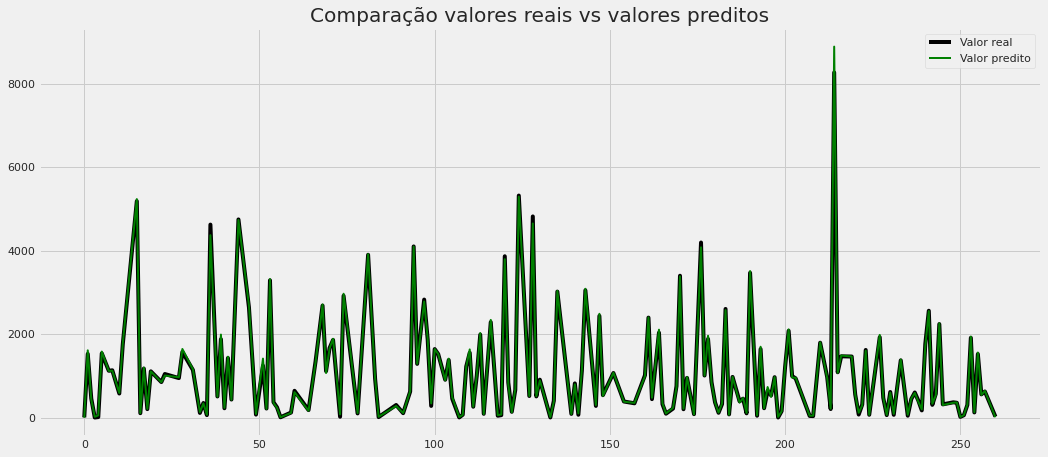

In [84]:
y_validation = pd.DataFrame(y_test)
y_validation['prediction'] = ypred

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

ax = sns.lineplot(x = y_validation.index, y = y_validation['target'], color = 'black', label='Valor real', lw=4)
ax = sns.lineplot(x = y_validation.index, y = y_validation['prediction'], color = 'green',label='Valor predito', lw=2)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Comparação valores reais vs valores preditos')
fig.set_size_inches(16,7)

Text(0.5, 0, 'CatBoost Feature Importance')

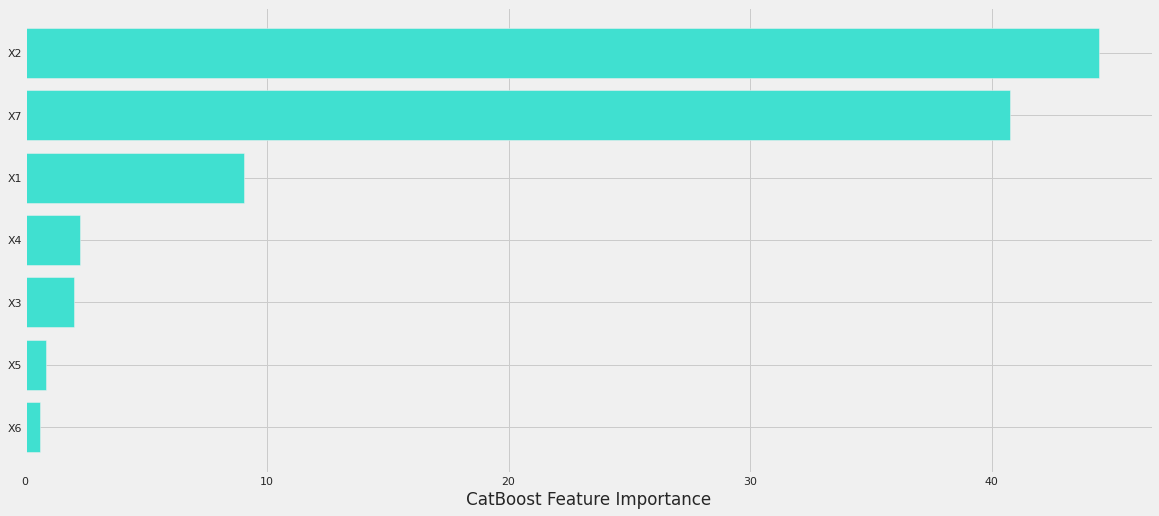

In [85]:
# Gráfico com o grau de importancia das features
sorted_feature_importance = cat_model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_feature_importance], 
        cat_model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

# Resumo:
- Usei três técnicas diferentes para a modelagem:
- Técnica 1: Dados nulos tratados com um modelo de regreção:
 - Um modelo foi montado para prever os valores faltantes, para então poder avalaliar com os dados de teste final.
 - Essa tecnica trouxe em sua fase final um erro percentual médio de 49%
- Técnica 2: Dados nulos tratados com valor zero:
 - Todos os valores nulos da feature target, foram preenchidos com o valor zero, nos dados de teste final os dados nulos foram excluídos pois as metricas de avaliação não aceita entrada de valores nulos.
 - Essa técnica não partiu para a fase final, já que logo no treino e teste apenas com os dados de treino, os resultados das metricas estavam muito elevados.
- Técnica 3: Todos os dados noulos foram excluídos dos data sets:
 - Sem muito segredo, os dados ficaram livre de valores nulos.
 - Essa técnica nos trouxe em sua fase final um erro percentual médio de 37%.

- Resultados com MAPE entre 0 a 0.10 são ótimos para um modelo, MAPEs com avaliação entre 0.10 e 0.20 são ótimos para o modelo.

Todos os resultados foram gerados com modelos "cru" com parâmetros padrões, é possível ainda fazer um grid search para encontrar o melhor conjunto de parâmetros e tentar melhorar esse resultado.